**Yapay Sinir Ağları İçin Problem İfadesini Anlamak**

Burada meme kanseri veri seti ile uğraşıyorum. Toplamda 33 boyutumuz ve 569 kaydımız olan bir veri setimiz var. Ele alacağımız boyutlar aşağıdaki gibidir:

1 ) diagnosis

2 ) radius_mean

3 ) texture_mean

4 ) perimeter_mean

5 ) area_mean

...

32) Unnamed: 32

Tüm bağımsız değişkenleri (ilk 32) dikkate alacak ve buna göre hastanın kansere olup olmadığı tahmin edecek bir yapay sinir ağı oluşturulmaktır. (Çıkış burada bağımlı değişkendir).

Veri seti: https://drive.google.com/file/d/1NIIDYFi_aEcDM__WDcPX5XBl24Aixv_E/view?usp=sharing

**Gerekli Kütüphanelerin Tanımlanması**

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.decomposition import PCA as sklearnPCA

# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings("ignore")

**Veri Setinin Yüklenmesi**

In [ ]:
data = pd.read_csv("/content/data.csv")
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


**Veri setinin boyutunun öğrenilmesi**

In [ ]:
print("Bu veri seti",data.shape[0],"satırdan ve",data.shape[1],"sütündan oluşur")
data.shape

Bu veri seti 569 satırdan ve 33 sütündan oluşur


(569, 33)

**Son Sütunun Silinmesi**


Son sütunda boş verilerin olmasından dolayı burayı almamıza gerek yoktur. Bu yüzden bu sütunu kaldırdım.

In [ ]:
del data['Unnamed: 32']
data.shape

(569, 32)

**Özellik Matrisi Oluşturma (X)**

Bir makine öğrenme modeli oluştururken temel ilke, Özellikler Matrisi olarak da adlandırılan X'i oluşturmaktır. Bu X temel olarak tüm bağımsız değişkenlerimizi içerir.

Burada 'id' ve 'diagnosis' sütunundan 'Unnamed: 32' sütununa kadar tüm verileri alıyoruz. Bunun nedeni modele bir etkisi olmayacağından.

In [ ]:
X = data.iloc[:, 2:].values

**Bağımlı Değişken Vektör Oluşturma**

Bağımsız değişken için öznitelik matrisimizi(X) oluşturduğumuz gibi, sadece bağımlı değişken değerlerimizi içerecek bir bağımlı değişken vektörü(Y) de oluşturmalıyız. Bu kapsamda 'diagnosis' sütununu bir değişkene atadım.

In [ ]:
y = data.iloc[:, 1].values

**Tanı Özeti (Diagnosis)**

Verileri görselleştirerek daha iyi anlamaya çalıştım.

Meme dokularının teşhisi sayısını grafiğe dökülmüş hali. (M=malign, B=benign)




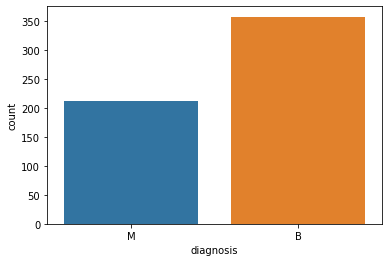

In [ ]:
sns.countplot(data['diagnosis'],label="Count")

Meme Kanseri Teşhisi Veri Seti Özelliklerinin Korelasyonunu gösteren grafik

Text(0.5, 1.05, 'Correlation of WBCD Features')

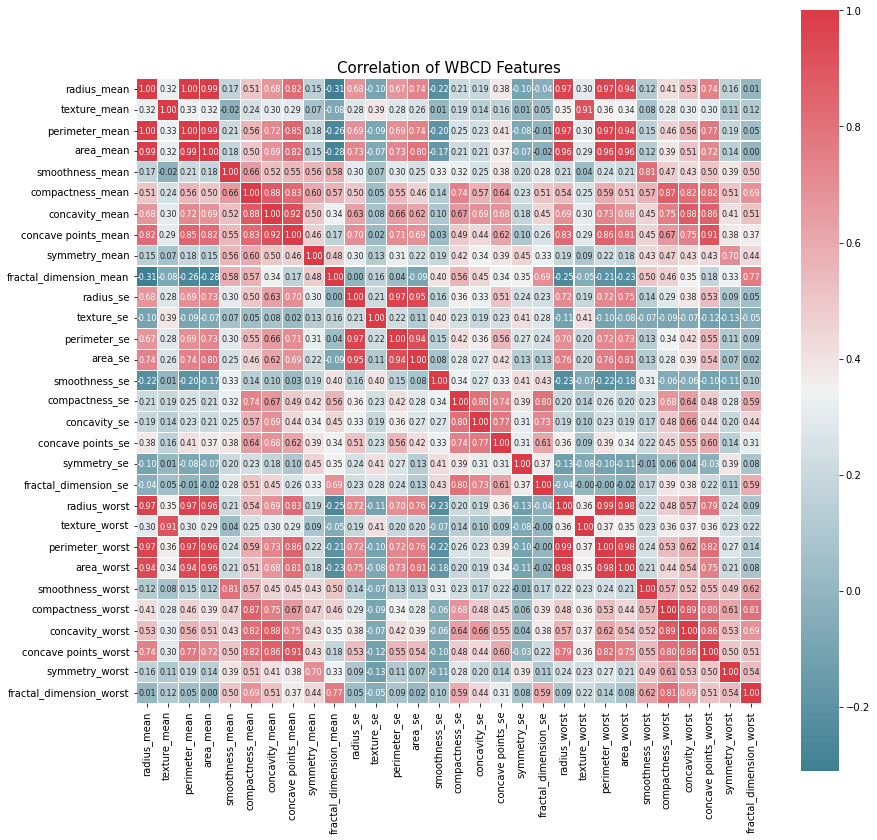

In [ ]:
corr = data.iloc[:,2:].corr()
colormap = sns.diverging_palette(220, 10, as_cmap = True)
plt.figure(figsize=(14,14))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 8},
            cmap = colormap, linewidths=0.1, linecolor='white')
plt.title('Correlation of WBCD Features', y=1.05, size=15)

Burada diagnosis(tanı) sütunumuz kötü huylu ve iyi huylu olmak üzere sadece 2 kategoriye sahiptir, LabelEncoding kullanacağız. Bu tür kodlama, bu sütunu 0 ve 1 değerlerine sahip bir sütuna dönüştürecektir. Label Encoding'i kullanmak için sklearn kütüphanesinden LabelEncoder sınıfını kullanacağız.

In [ ]:
# Kategorik verileri kodlama
from sklearn.preprocessing import LabelEncoder
labelencoder_X_1 = LabelEncoder()
y = labelencoder_X_1.fit_transform(y)

Bu adımda, veri setimizi eğitim ve test veri setlerine ayıracağız. Bu, tüm makine öğrenimi sürecinin temel taşlarından biridir. Eğitim veri seti, modelimizin üzerinde eğitim alacağı, test veri seti ise modelimizin performansını test edeceğimiz veri setidir. Veri setimizi, eğitim aşamasında verinin yüzde 80'i oranda olacak ve verinin yüzde 20'si test aşamasında olacak şekilde böldük.

In [ ]:
# Veri setini Eğitim seti ve Test seti olarak bölme
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

Model oluşturma sırasında, aşırı yüksek değerli değişkenlerin, aşırı düşük değerli değişkenlere hakim olma şansı vardır. Bu nedenle, düşük değerli değişkenlerin modelimiz tarafından ihmal edilme olasılığı vardır ve bu nedenle özellik ölçekleme gereklidir.

*   Standardizasyon (Standardization)
*   Normalleştirme (Normalization)


Standardizasyon yapıldığında, veri setindeki tüm değerler -3 ile +3 arasında değişen değerlere dönüştürülecektir. Normalleştirme durumunda, tüm değerler -1 ile +1 arasında bir aralığa dönüştürülecektir. Burada Standardizasyonu kullanacağız.


In [ ]:
# Özellik Ölçeklendirme
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

YSA oluşturmak için gerekli kütüphaneleri ekledim

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import tensorflow as tf

**YSA OLUŞTURMA**


YSA oluştururken ilk adımdır. Burada, Sequential adlı belirli bir Keras sınıfını kullanarak ann nesnemizi oluşturacağız.

In [ ]:
# YSA başlatılıyor
ann = tf.keras.models.Sequential()

**Gizli Katmanları Oluşturma**

Burada 2 gizli katman, 1 giriş katmanı ve 1 çıkış katmanı olacak şekilde bir ağ oluşturacağız. Burada katmanlar modülünün bir parçası olan Dense sınıfını kullanarak ilk gizli katmanımızı oluşturduk. Bu sınıf 2 girişi kabul eder:

*   units: ilgili katmanda bulunacak nöron sayısı

*   activation: hangi aktivasyon fonksiyonunun kullanılacağını belirtin


Seyreltme ve bırakma (Dropout), eğitim verilerinde karmaşık eş-adaptasyonları önleyerek yapay sinir ağlarında fazla uydurmayı azaltmak için düzenleme teknikleridir. Böylelikle ağ içindeki bazı nöronların kaldırılmasıyla  eğitim performansı artacağı varsayılıyor.

In [ ]:
# İlk Gizli Katmanı Ekleme
ann.add(tf.keras.layers.Dense(units=16,activation="relu"))
tf.keras.layers.Dropout(rate=0.1)

İkinci girdi için, gizli katmanlar için aktivasyon fonksiyonu olarak her zaman "relu" [rectified linear unit] kullanacağız. İki gizli katman oluşturacağımız için aynı adımı ikinci gizli katmanı oluşturmak için de tekrarlayacağız. Aynı zamanda bu adımda da Dropout işlemini uygulayacağız.

In [ ]:
# İkinci Gizli Katmanı Ekleme
ann.add(tf.keras.layers.Dense(units=16,activation="relu"))
tf.keras.layers.Dropout(rate=0.1)

**Çıktı Katmanı Oluşturma**

Bu adımda ann için çıktı katmanımızı oluşturacağız. Burada yine çıktı katmanını oluşturmak için Dense sınıfını kullanacağız. Burada hatırlanması gereken iki önemli şey:

1.   Çıktı olarak sadece iki sınıfa (1 ve 0) sahip olacağımız bir ikili sınıflandırma probleminde, bu sonucu çıktılamak için sadece bir nöron tahsis edeceğiz. Çok sınıflı sınıflandırma problemi için çıktı katmanında birden fazla nöron kullanmak zorundayız. Örneğin, çıktımız 4 kategori içeriyorsa 4 farklı nöron [her kategori için bir tane] oluşturmamız gerekir.

2.   İkili sınıflandırma Problemleri için her zaman kullanılması gereken aktivasyon fonksiyonu sigmoiddir. Çok sınıflı bir sınıflandırma problemi için kullanılması gereken aktivasyon fonksiyonu softmax'tır.


Burada ikili sınıflandırma ile uğraştığımız için çıktı katmanında sadece bir nöron tahsis ediyoruz ve kullanılan aktivasyon fonksiyonu sigmoid'tir.

In [ ]:
# Çıktı Katmanı Ekleme
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

**YSA DERLENMESİ**

Artık sinir ağımız için katmanlar oluşturduk. Bu adımda YSA'mızı derleyeceğiz. Ağımızı derlemek için ann nesnemizin derleme yöntemini kullandık. Derleme yöntemi aşağıdaki girdileri kabul eder:

1.   optimizer: stokastik gradyan inişi gerçekleştirmek için hangi optimize edicinin kullanılacağını belirtir. RMSProp, adam gibi çeşitli optimize edicilerİ deneyebilirsiniz.


2.   loss: hangi kayıp fonksiyonunun kullanılması gerektiğini belirtir. İkili sınıflandırma için değer binary_crossentropy olmalıdır. Çok sınıflı sınıflandırma için categorical_crossentropy olmalıdır.


3.   metrics: performansı hesaplamak için hangi performans metriklerinin kullanılacağı. Burada bir performans ölçüsü olarak doğruluğu (accuracy) kullandık.

In [ ]:
# YSA Derleme
ann.compile(optimizer="RMSProp",loss="binary_crossentropy",metrics=['accuracy'])

**Yapay Sinir Ağı Uydurma (Fitting)**

Bu, ann oluşturma sürecimizdeki son adımdır. Burada sadece ann'imizi eğitim veri seti üzerinde eğiteceğiz. Burada ann'ımızı eğitmek için fit yöntemini kullandık. Fit yöntemi bu durumda 4 girişi kabul ediyor:

*    X_train : Eğitim veri kümesi için özellik matrisi
*   Y_train : Eğitim veri seti için bağımlı değişken vektörleri
*   batch_size : partide kaç gözlem olması gerektiği. Genellikle bu parametrenin değeri 32'dir ancak başka herhangi bir değerle de deney yapabiliriz.
*   epochs : Sinir ağlarının kaç kez eğitileceği. Burada deneyimlerimden bulduğum optimal değer 100'dür.

In [ ]:
# Fitting ANN
mod = ann.fit(X_train,y_train,batch_size=64,epochs = 200)

Epoch 1/200
7/7 [==============================] - 1s 6ms/step - loss: 0.7137 - accuracy: 0.5955
Epoch 2/200
7/7 [==============================] - 0s 5ms/step - loss: 0.6218 - accuracy: 0.7111
Epoch 3/200
7/7 [==============================] - 0s 6ms/step - loss: 0.5632 - accuracy: 0.7789
Epoch 4/200
7/7 [==============================] - 0s 7ms/step - loss: 0.5179 - accuracy: 0.8216
Epoch 5/200
7/7 [==============================] - 0s 4ms/step - loss: 0.4744 - accuracy: 0.8568
Epoch 6/200
7/7 [==============================] - 0s 4ms/step - loss: 0.4351 - accuracy: 0.8744
Epoch 7/200
7/7 [==============================] - 0s 7ms/step - loss: 0.3963 - accuracy: 0.8819
Epoch 8/200
7/7 [==============================] - 0s 4ms/step - loss: 0.3607 - accuracy: 0.8920
Epoch 9/200
7/7 [==============================] - 0s 4ms/step - loss: 0.3277 - accuracy: 0.8995
Epoch 10/200
7/7 [==============================] - 0s 4ms/step - loss: 0.2980 - accuracy: 0.9070
Epoch 11/200
7/7 [===========

**MDOEL DEĞERLENDİRME**

Burada modelimizin ne kadar iyi öğrendiğini değerlendirmek için metriklerle deniyorum. Kullandığım metrikler :


1.   Mean Squared Error
2.   Confusion Matrix
3.   Accuracy_score
4.   F1 Score
5.   Classification_report

sklearn kütüphanesinin metrics altındaki fonksiyonlardan yararlanarak bu metrikleri ekledim.

In [ ]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error, f1_score
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
score = f1_score(y_test, y_pred, average='binary')
print("\nEğitim Puanı: ",score*100)

# Modelin doğruluğunu yazdırma
print("Modelinin doğruluğu,: ", accuracy_score(y_test, y_pred)*100, "%")

dl_results=accuracy_score(y_test, y_pred)*100
print("Model Sonucu: ",dl_results)

6/6 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       108
           1       0.98      0.98      0.98        63

    accuracy                           0.99       171
   macro avg       0.99      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171

[[107   1]
 [  1  62]]

Eğitim Puanı:  98.4126984126984
Modelinin doğruluğu,:  98.83040935672514 %
Model Sonucu:  98.83040935672514


In [ ]:
# Tek Gözlem için sonucu tahmin etme
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1,50000,1,11,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]])) > 0.5)

1/1 [==============================] - 0s 55ms/step
[[ True]]


**Model Kaybı**

Loss function, belirli bir algoritmanın sağlanan verileri ne kadar iyi modellediğini hesaplar.

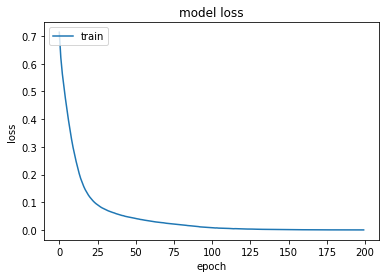

In [ ]:
plt.plot(mod.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Model Doğruluğu**

Bir modelin başarısını ölçmek için çokça kullanılan bir metriktir

dict_keys(['loss', 'accuracy'])


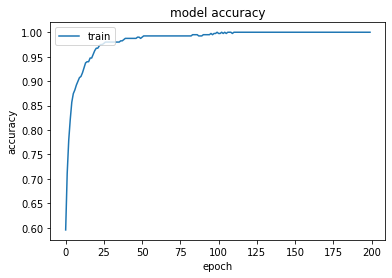

In [ ]:
# geçmişteki tüm verileri listele
print(mod.history.keys())
# doğruluk için geçmişi özetleyin
plt.plot(mod.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**SONUÇLAR**

İLK etapta modelin parametreleri olan

random_state = 0

batch_size = 32

epochs = 100

optimizer = adam

Yukarıda belirtiği gibi alınmıştır. Bu parametrelere göre modelin doğruluk sonucu aşağıda da görüldüğü gibi yaklaşık olarak %95 tir.


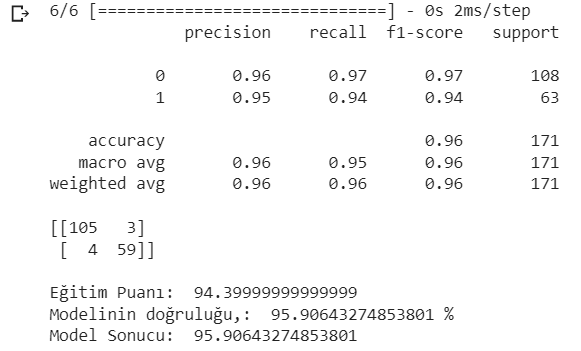





Yukarıda ki bu parametreler üzerinde uzunca süre oynamalar yaptığım da en optimal sonucu aşağıda belirttiğim gibi olan değişkenlerde aldım.

random_state = 42

batch_size = 64

epochs = 200

optimizer = Rmstop




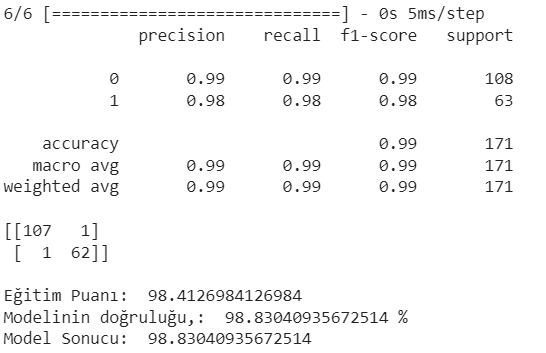